
# Analysis of Isobaric VLE - Data <br> Benzene/Acetone System

In [2]:
# Import modules here
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import style
from scipy.optimize import minimize
from IPython.display import display, Math
from PIL import Image

%config InlineBackend.figure_format = 'retina'

style.use("default")

%matplotlib inline

### All the Physico chemical data

In [3]:
# Physico-chemical data : 
# A will denote Acetone and B will denote Benzene
rhoa = 0.792   # Density of Acetone , g/mL
rhob = 0.879   # Density of Benzene , g/mL
mwa = 58.8     # Gram Molecular mass of Acetone, g/mol
mwb = 78.11    # Gram Molecular mass of Benzene, g/mol
mva = rhoa/mwa   # 1/Molar Volume of Acetone, gmol/mL
mvb = rhob/mwb   # 1/Molar Volume of Benzene, gmol/mL
Pt = 101.325     # Total Pressure
R = 8.314462    # Universal Gas constant, J/K-mol  

### The experiment is done using a refractometer. We will first draw the caliberation curve in order to relate the refractometer readings and the mole fractions. 

In [4]:
data_main = pd.read_excel('VLE.xlsx')
data_calib = pd.read_excel('VLE.xlsx',header =10, usecols = 'A:D')[:14]    
print("This is the data obtained for Caliberation of the Refractometer")
data_calib

This is the data obtained for Caliberation of the Refractometer


,Sr. no,V1 (mL),V2 (mL),RIx
0,1,0,80,1.504
1,2,10,100,1.490
2,3,40,150,1.451
3,4,40,100,1.440
4,5,60,100,1.427
5,6,80,100,1.417
6,7,100,100,1.410
7,8,60,50,1.404
8,9,70,50,1.399
9,10,80,50,1.395


### Finding the Mole fractions for Caliberation

In [5]:
data_calib['Moles(A)'] = data_calib['V1 (mL)']*mva
data_calib['Moles(B)'] = data_calib['V2 (mL)']*mvb
data_calib['Total Moles'] = data_calib['Moles(A)']+ data_calib['Moles(B)']
data_calib['x1'] = data_calib['Moles(A)'] / (data_calib['Total Moles'])
#data_calib.drop(['check'], axis = 1)

### Caliberation Curve

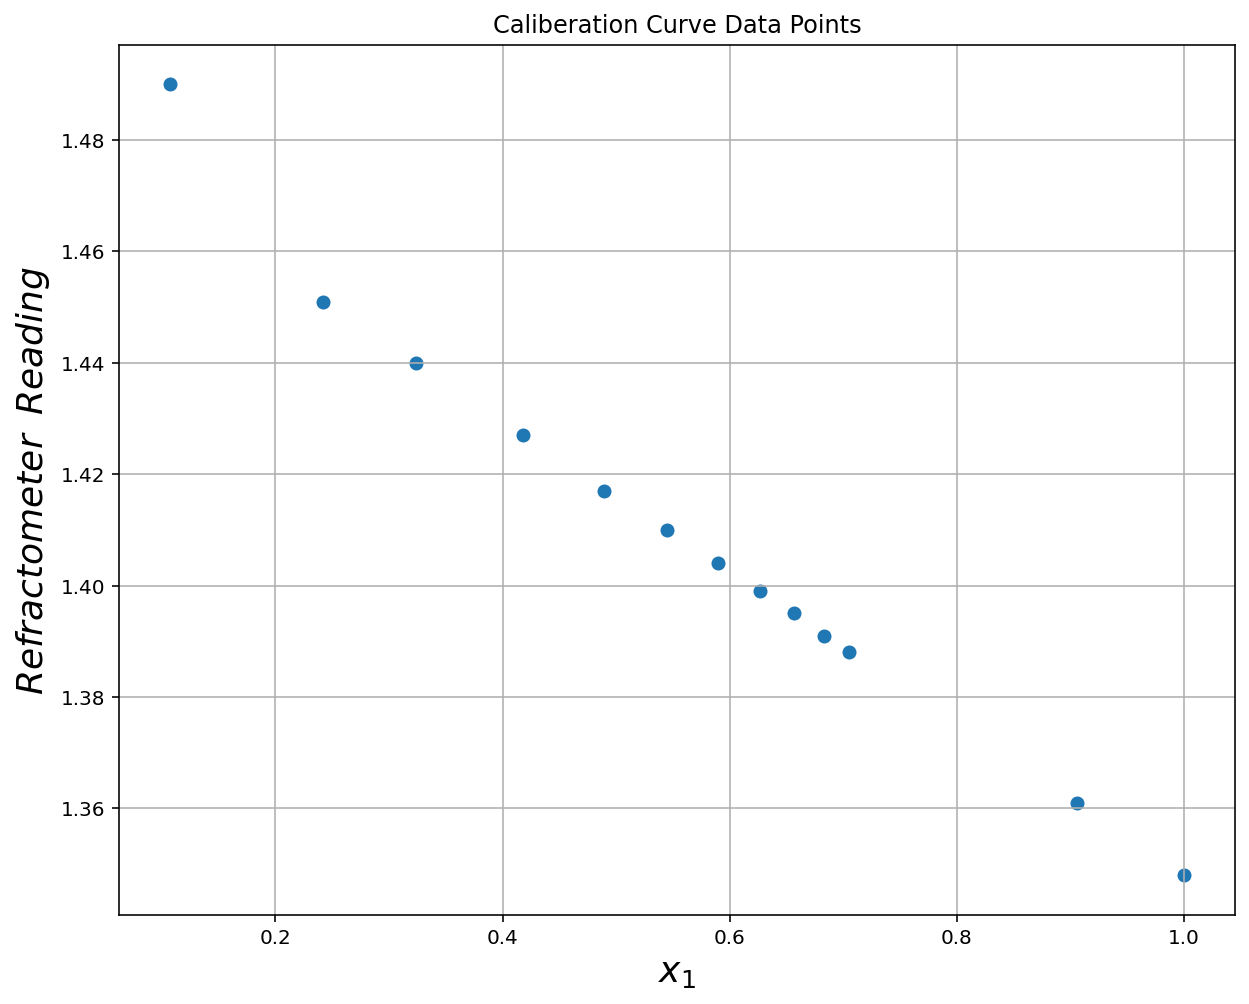

In [6]:
# PLotting the available data
x = data_calib['x1'][1:].to_numpy()
y = data_calib['RIx'][1:].to_numpy()
plt.figure(figsize = (10,8))
plt.scatter(x,y)
plt.xlabel('$ x_{1} $',fontsize = 18)
plt.ylabel('$ Refractometer \; \; Reading $', fontsize = 18)
plt.title('Caliberation Curve Data Points')
plt.grid(True)

### Fitting a linear curve of type :  $$ RI_{x} = Ax_{1} + B $$   

Text(0.6, 1.44, 'y = -0.148x + 1.492')

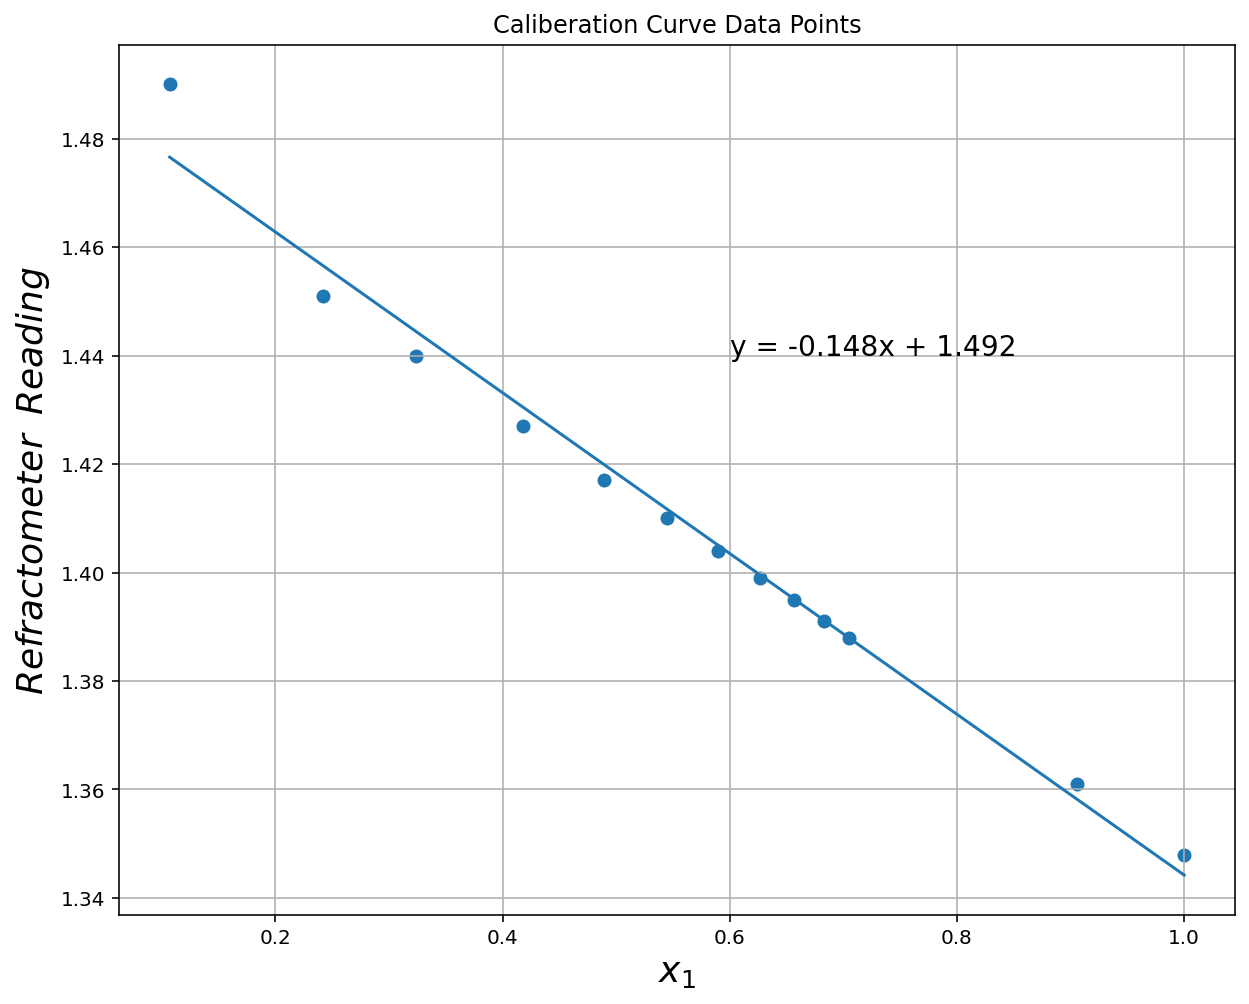

In [7]:
xi = np.array([x[l] for l in range(len(x))])
yi = np.array([y[l] for l in range(len(y))])
(A,B) = np.polyfit(xi,yi,1)
y_curve = A*xi + B
plt.figure(figsize = (10,8))
plt.plot(xi,y_curve)
plt.scatter(x,y)
plt.xlabel('$ x_{1} $',fontsize = 18)
plt.ylabel('$ Refractometer \; \; Reading $', fontsize = 18)
plt.title('Caliberation Curve Data Points')
equation = 'y = ' + str(round(A,3)) + 'x' ' + ' + str(round(B,3))
plt.grid(True)
plt.text(0.6,1.44,equation, fontsize = 14)

### Now that we have obtained the caliberation curve, we will now analyse the Experimental Data Points and extract the necessary data 

In [8]:
data_obs = pd.read_excel('VLE.xlsx',header =38, usecols = 'A:F')[:11]
print("This is the observations Table :")
data_obs

This is the observations Table :


,Sr. no,V1 (mL),V2 (mL),RI x,RI y,T (°C)
0,1,0,100,1.494,1.494,80
1,2,10,90,1.483,1.463,74.3
2,3,20,80,1.470,1.443,70.4
3,4,30,70,1.457,1.429,67.5
4,5,40,60,1.444,1.416,65.2
5,6,50,50,1.431,1.406,63.2
6,7,60,40,1.417,1.395,61.5
7,8,70,30,1.403,1.386,60
8,9,80,20,1.388,1.376,58.6
9,10,90,10,1.372,1.367,57.3


### We will Calculate the Vapour Pressure Using the following Correlation : <br> $ln(P) = C_{1}+\frac{C_{2}}{T} C_{3}ln(T) + C_{4}T^{C_{5}}$  <br> P in Pa, T in K <br> Will define a Class Below to calculate the same : 

In [9]:
class VapourPressure() : 
    C1a = 69.006
    C2a = -5599.6
    C3a = -7.0985
    C4a = 6.2237e-6
    C5a = 2
    C1b = 83.107
    C2b = -6486.2 
    C3b = -9.2194
    C4b = 6.9844e-6
    C5b = 2
    VP = 0
    def VapPres(self,T,c1,c2,c3,c4,c5):
        lnP = c1 + c2/T + c3*np.log(T) + c4*(T**c5)
        self.VP  = np.exp(lnP)
        return self.VP
    def VapAcet(self,T):
        VP = self.VapPres(T,self.C1a,self.C2a,self.C3a,self.C4a,self.C5a)
        return VP
    def VapBenz(self,T):
        VP = self.VapPres(T,self.C1b,self.C2b,self.C3b,self.C4b,self.C5b)
        return VP

### Calulating Vapour Pressure : 

In [10]:

V1 = data_obs['V1 (mL)'].to_numpy()
V2 = data_obs['V2 (mL)'].to_numpy()
RIx = data_obs['RI x'].to_numpy()
RIy = data_obs['RI y'].to_numpy()
T_degC = data_obs['T (°C)'].to_numpy()
T_K = T_degC + 273.16
data_obs['T (K)'] = T_K
VP = VapourPressure()
VP1 = np.array([VP.VapAcet(T_K[i]) for i in range(len(T_K))])  # Calculating Vapour Pressure
VP2 = np.array([VP.VapBenz(T_K[i]) for i in range(len(T_K))])
data_obs['VP(1) kPa'] = VP1/1000
data_obs['VP(2) kPa'] = VP2/1000


### Calculating Mole Fraction 

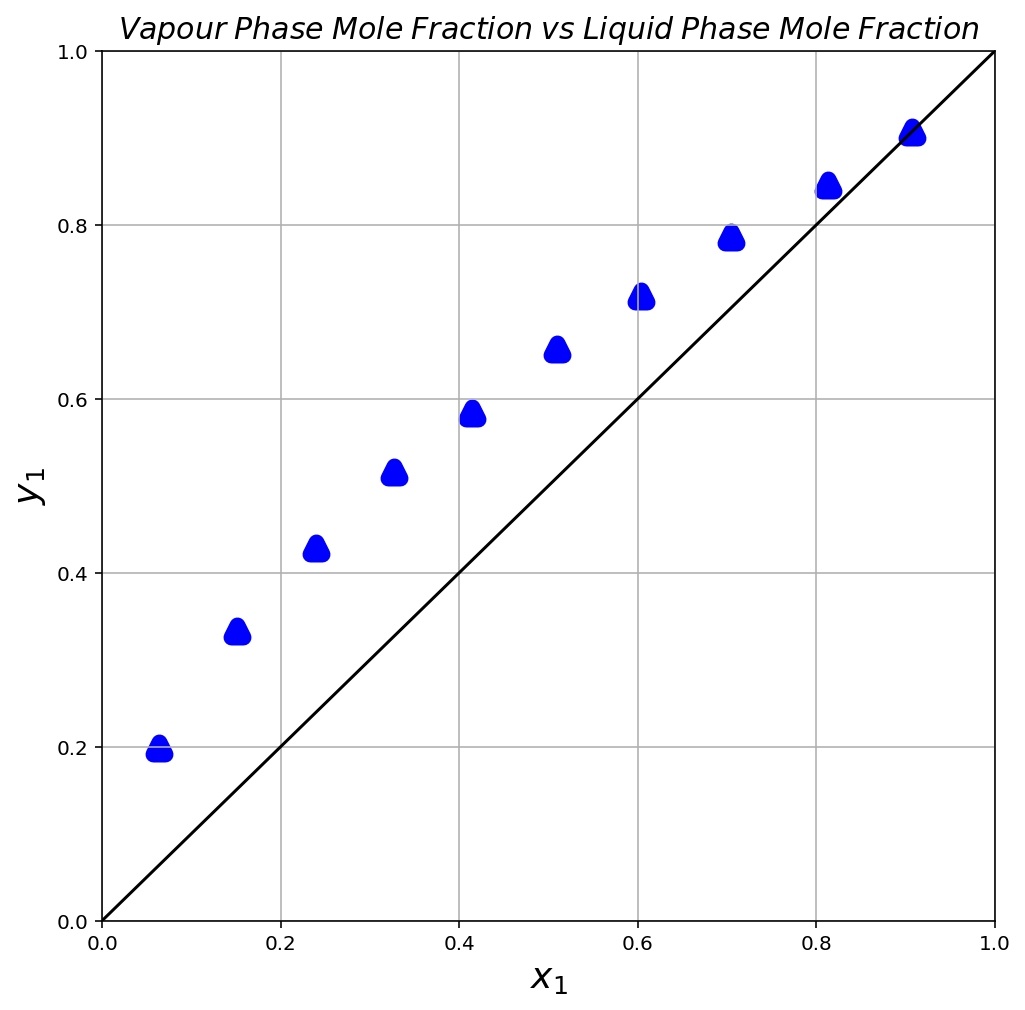

In [11]:
def GetMolFrac(Ri):
    return (Ri - B)/A

x1 = (RIx - B)/A
y1 = (RIy - B)/A
data_obs['$x_{1}$'] = data_obs["RI x"].apply(GetMolFrac)
data_obs['$y_{1}$'] = data_obs["RI y"].apply(GetMolFrac)
# Since Caliberation has some errors,  we are setting x,y = 0 and 1 at end points for Material Balance Consistancy
data_obs.iloc[0, data_obs.columns.get_loc('$x_{1}$')] = 0
data_obs.iloc[0, data_obs.columns.get_loc('$y_{1}$')] = 0
data_obs.iloc[len(x1)-1, data_obs.columns.get_loc('$x_{1}$')] = 1
data_obs.iloc[len(y1)-1, data_obs.columns.get_loc('$y_{1}$')] = 1 

plt.figure(figsize = (8,8))
plt.plot([0,1],[0,1],'k')
plt.scatter(x1,y1,c = 'b', marker = '^',linewidths = 8) 
plt.xlabel('$x_{1}$',fontsize = 18)
plt.ylabel('$y_{1}$',fontsize = 18)
plt.xlim([0,1])
plt.ylim([0,1])  
plt.title('$Vapour\; Phase \;Mole\; Fraction\; vs\; Liquid\; Phase\; Mole\; Fraction$',fontsize = 15)
plt.grid(True)

### Calculating Activity Coefficients :

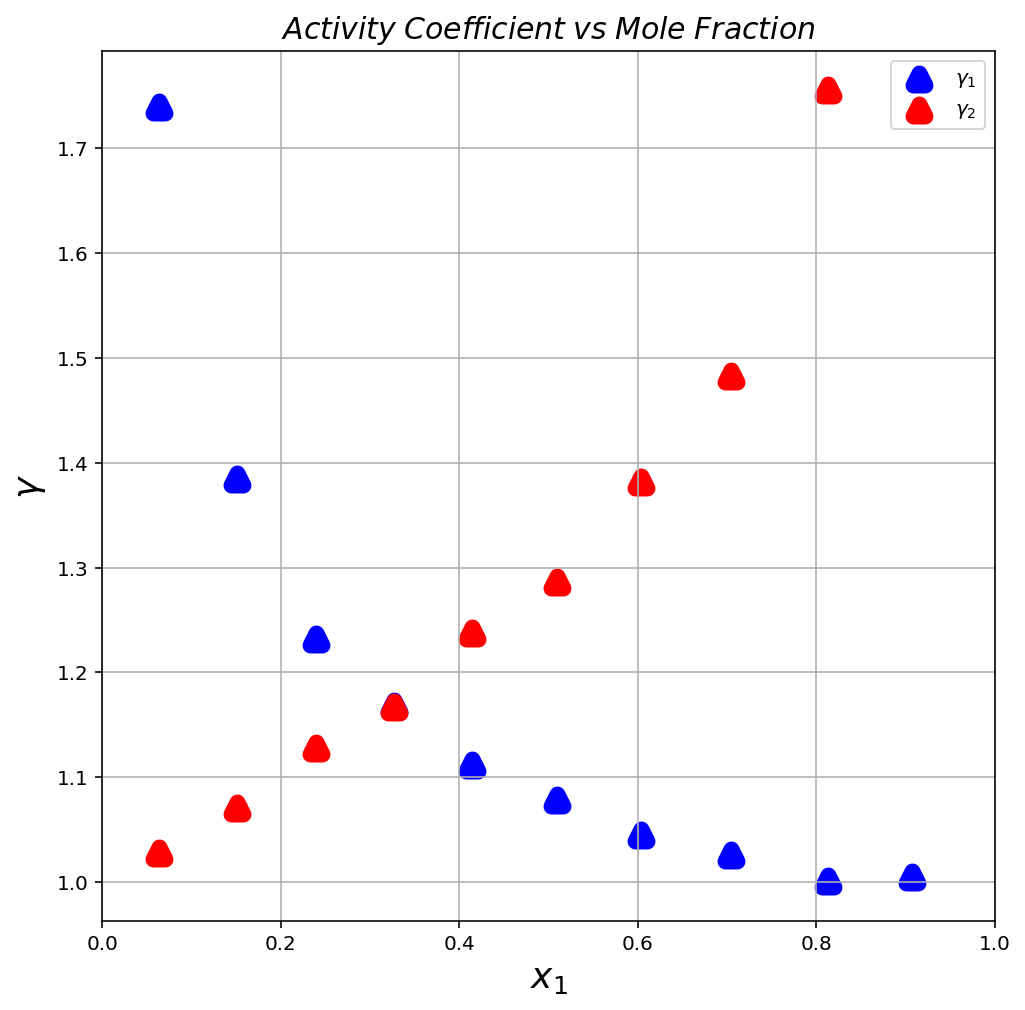

In [12]:
gamma1 = Pt*y1/(x1*VP1/1000)
gamma2 = Pt*(1-y1)/((1-x1)*VP2/1000)
data_obs['$\gamma_{1}$'] = gamma1
data_obs['$\gamma_{2}$'] = gamma2
# Since we cannot do division by zero, manually setting some activity coefficient to 1 (for thermodynamic consistancy) and '-'
data_obs.iloc[0, data_obs.columns.get_loc('$\gamma_{1}$')] = '-'
data_obs.iloc[0, data_obs.columns.get_loc('$\gamma_{2}$')] = 1
data_obs.iloc[len(x1)-1, data_obs.columns.get_loc('$\gamma_{1}$')] = 1
data_obs.iloc[len(x1)-1, data_obs.columns.get_loc('$\gamma_{2}$')] = '-'
plt.figure(figsize = (8,8))
plt.scatter(x1[1:],gamma1[1:],c = 'b', marker = '^',linewidths = 8 , label = '$\gamma_{1}$')
plt.scatter(x1[1:-1],gamma2[1:-1],c = 'r', marker = '^',linewidths = 8, label = '$\gamma_{2}$')
plt.xlabel('$x_{1}$',fontsize = 18)
plt.ylabel('$\gamma$',fontsize = 18) 
plt.xlim([0,1])
plt.title('$Activity \; Coefficient \; vs \; Mole \; Fraction $',fontsize = 15)
plt.grid(True)
plt.legend(loc = 'best')

### Calculating Excess Free Energy :

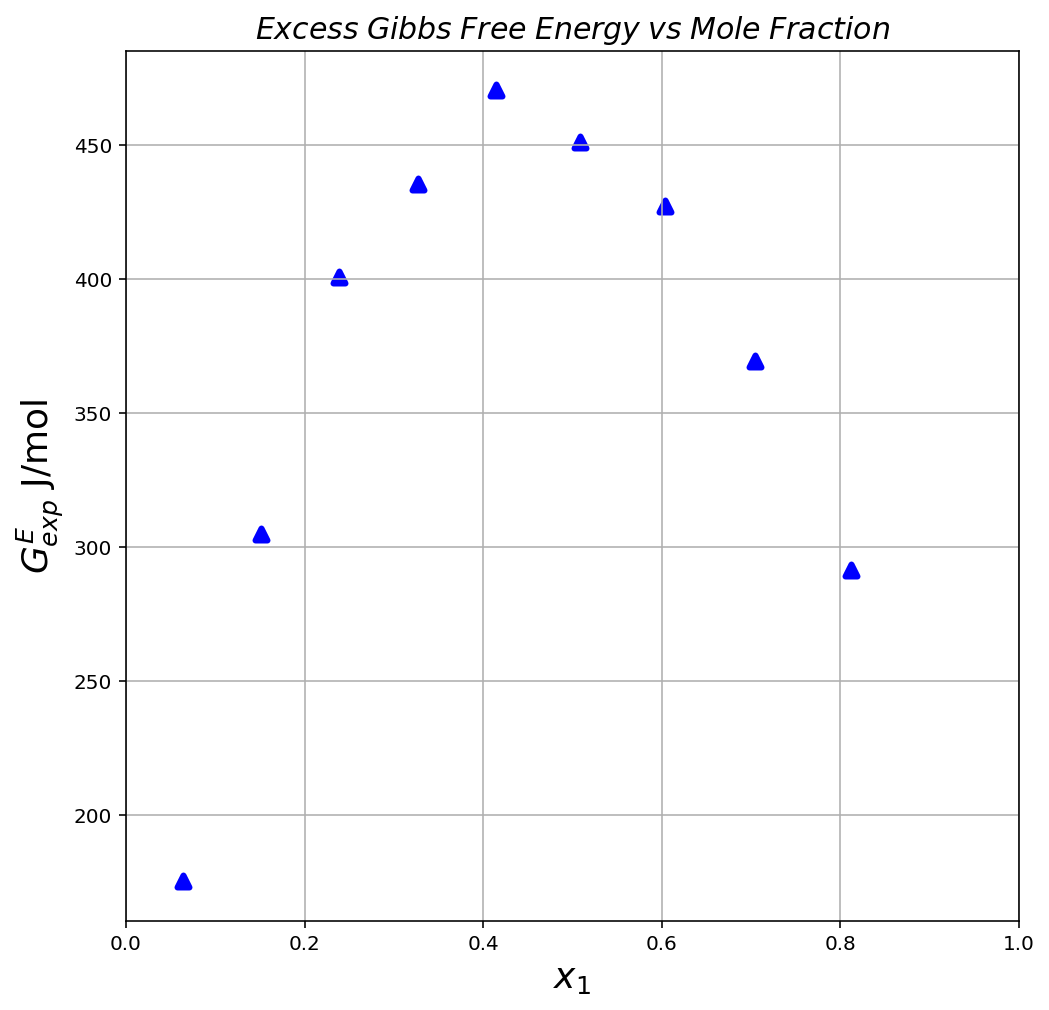

In [13]:
ge = R*np.array([T_K[i]*(x1[i]*np.log(gamma1[i]) + (1-x1[i])*np.log(gamma2[i])) for i in range(len(x1))])
ge[0] = 0 ; ge[len(x1)-1] = 0
data_obs['$G^{E}_{exp}$'] = ge
plt.figure(figsize = (8,8))
plt.scatter(x1[1:-1],ge[1:-1],c = 'b', marker = '^',linewidths = 3)
plt.xlabel('$x_{1}$',fontsize = 18)
plt.ylabel("$G^{E}_{exp}$ J/mol",fontsize = 18) 
plt.xlim([0,1])
plt.title('$Excess\;Gibbs\; Free\; Energy \; vs \; Mole \; Fraction $',fontsize = 15)
plt.grid(True)

## Our Final Manipulated Table looks like this : 

In [14]:
data_obs


,Sr. no,V1 (mL),V2 (mL),RI x,RI y,T (°C),T (K),VP(1) kPa,VP(2) kPa,$x_{1}$,$y_{1}$,$\gamma_{1}$,$\gamma_{2}$,$G^{E}_{exp}$
0,1,0,100,1.494,1.494,80,353.16,215.386464,100.955507,0.000000,0.000000,-,1,0.000000
1,2,10,90,1.483,1.463,74.3,347.46,181.812268,84.395116,0.063623,0.198571,1.739373,1.027575,175.325566
2,3,20,80,1.470,1.443,70.4,343.56,161.319346,74.354576,0.151339,0.333519,1.384199,1.070194,305.010719
3,4,30,70,1.457,1.429,67.5,340.66,147.298351,67.519741,0.239056,0.427982,1.231533,1.128086,400.775221
4,5,40,60,1.444,1.416,65.2,338.36,136.878711,62.461101,0.326772,0.515698,1.168241,1.166972,435.403864
5,6,50,50,1.431,1.406,63.2,336.36,128.300803,58.311135,0.414488,0.583172,1.111150,1.237045,470.504559
6,7,60,40,1.417,1.395,61.5,334.66,121.350023,54.958795,0.508951,0.657394,1.078515,1.286323,451.071898
7,8,70,30,1.403,1.386,60,333.16,115.468607,52.130021,0.603415,0.718120,1.044321,1.381516,427.521500
8,9,80,20,1.388,1.376,58.6,331.76,110.186099,49.595800,0.704625,0.785594,1.025250,1.482980,369.527703
9,10,90,10,1.372,1.367,57.3,330.46,105.455024,47.331645,0.812584,0.846321,1.000728,1.755388,291.379627


In [15]:
x1[0] = 0 ; x1[len(x1)-1] = 1
y1[0] = 0 ; y1[len(y1)-1] = 1


# Fitting Activity Coefficient Models To Correlate with the Data set and Predict Activity Coefficients of the VLE System !

## Since this is an Isobaric Data set, we will use <br> 1) Wilson's Model <br> 1) Renon and Prausnitz NRTL Model

## Wilsons Model : <br> $ \frac{G^{E}}{RT} = -x_{1}ln(x_{1}+x_{2}\Lambda_{12}) -x_{2}ln(x_{2}+x_{1}\Lambda_{21}) $ <br> $ ln(\gamma_{1}) = -ln(x_{1}+x_{2}\Lambda_{12}) + x_{2}( \frac{\Lambda_{12}}{x_{1}+x_{2}\Lambda_{12}} - \frac{\Lambda_{21}}{x_{2}+x_{1}\Lambda_{21}} ) $ <br>  $ ln(\gamma_{2}) = -ln(x_{2}+x_{1}\Lambda_{21}) - x_{1}( \frac{\Lambda_{12}}{x_{1}+x_{2}\Lambda_{12}} - \frac{\Lambda_{21}}{x_{2}+x_{1}\Lambda_{21}} ) $ <br> $ \Lambda_{12} \; and \; \Lambda_{21} \; are \; the \; two \; parameters \; given\; by \: : $ <br> $ Lambda_{12} = \frac{V_{2}}{V_{1}}exp( \frac{-(\lambda_{12}-\lambda_{11})}{RT} ) $ <br> $ \Lambda_{21} = \frac{V_{1}}{V_{2}}exp( \frac{-(\lambda_{12}-\lambda_{22})}{RT} ) $ <br> $ So \; essentially \; the \; parameters \; are \; (\lambda_{12} - \lambda_{11}) \; (say \; A_{1}) \; and \; (\lambda_{12} - \lambda_{22}) \; (say \; A_{2}) $

### I will define a Class that will Handle all the Operations related to this Model 

In [16]:
class Wilson :
    V1 = 1/mva
    V2 = 1/mvb
    R = 8.314462
    
    def getParam(self, T, A1, A2 ) :
        self.Lambda12 = (self.V1/self.V2)*np.exp(-A1/self.R/T)
        self.Lambda21 = (self.V2/self.V1)*np.exp(-A2/self.R/T)
        return (self.Lambda12,self.Lambda21)
    
    def getGamma(self,T,x_1, A1, A2) :
        x_2 = 1 - x_1 
        (L12,L21) = self.getParam(T,A1,A2)
        ln_gamma1 = -np.log(x_1 + x_2*L12) + x_2*( (L12/(x_1 + x_2*L12)) - (L21/(x_2 + x_1*L21)))
        ln_gamma2 = -np.log(x_2 + x_1*L21) - x_1*( (L12/(x_1 + x_2*L12)) - (L21/(x_2 + x_1*L21)))
        self.gama1 = np.exp(ln_gamma1)
        self.gama2 = np.exp(ln_gamma2)
        return (self.gama1,self.gama2)
    
    def getGe(self,T, x_1) :
        x_2 = 1-x_1
        self.geRT = x_1*np.log(self.gama1) + x_2*np.log(self.gama2)
        return self.geRT*R*T
    
    def ObjectiveFunc(self,A) :
        
        lambda12 = np.zeros(len(x1)) ; lambda21 = np.zeros(len(x1))
        gam1 = np.zeros(len(x1)) ; gam2 = np.zeros(len(x1))
        Ge = np.zeros(len(x1))
        for i in range(1,len(x1)-1):
            (L12,L21) = self.getParam(T_K[i], A[0], A[1])
            lambda12[i],lambda21[i] = L12,L21
            (g1,g2) = self.getGamma(T_K[i],x1[i], A[0], A[1])
            gam1[i],gam2[i] = g1,g2
            Ge[i] = self.getGe(T_K[i],x1[i])
        
    
        error = np.sum((ge - Ge)**2)   
   
        return error

### Defining a Class that contains all the necessary experimental data : 

In [17]:
class Experimental : 
    mol_frac = x1
    Temperature = T_K
    excess_G = ge
    activity_coeff_1 = gamma1
    activity_coeff_2 = gamma2
    
#I was onto something but then I forgot why I created this class ! :p

## Minimizing the Objective function to find the parameters : 

In [18]:
x0 = np.zeros(2)
x0[0] = 0.1 ; x0[1] = 0.1
model = Wilson()
sol = minimize(model.ObjectiveFunc , x0 )
A1,A2 = sol.x[0],sol.x[1]

## We will now Check if the model works or not : 

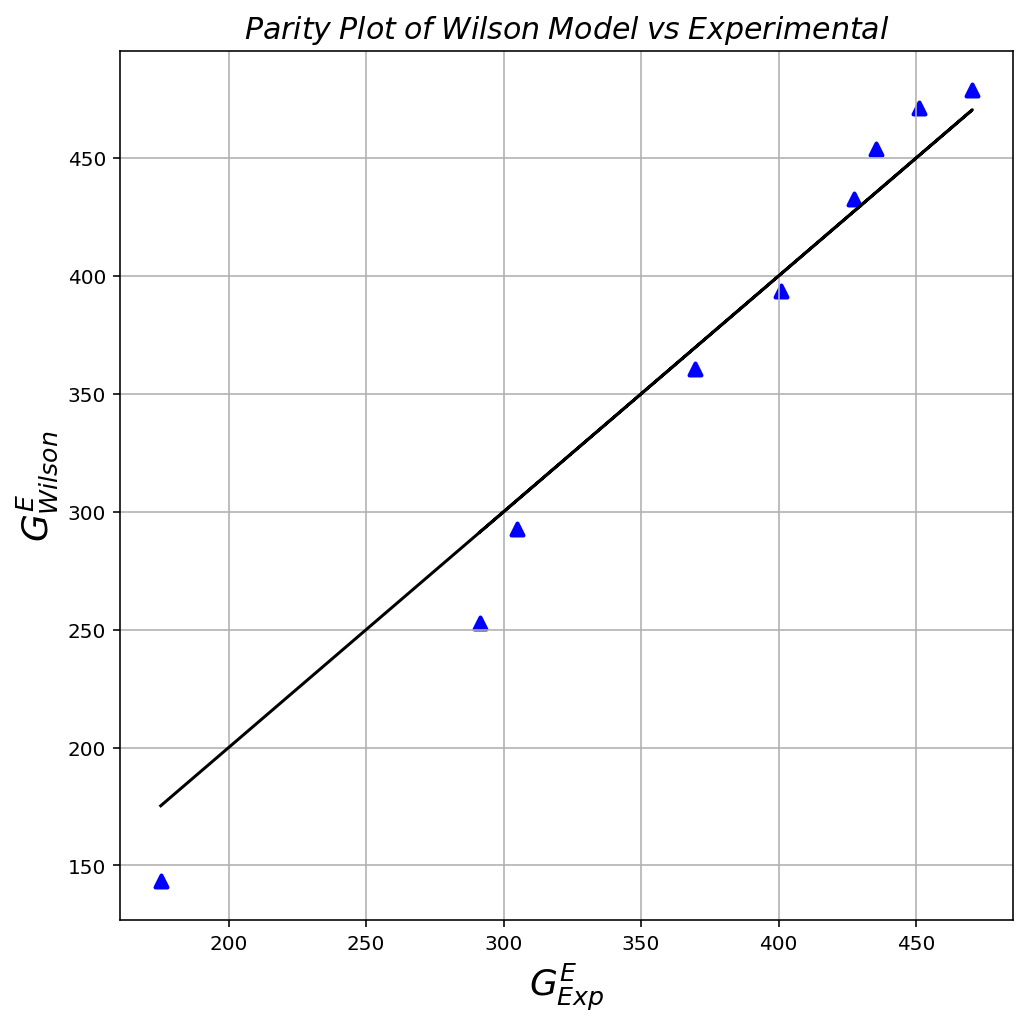

In [33]:
wilson = Wilson()
Ge = np.zeros(len(x1))
for i in range(1,len(x1)-1):
        wilson.getParam(T_K[i], A1, A2)
        wilson.getGamma(T_K[i],x1[i], A1, A2)
        Ge[i] = wilson.getGe(T_K[i],x1[i])
plt.figure(figsize = (8,8))
plt.scatter(ge[1:-1],Ge[1:-1], c = 'b', marker = '^',linewidths = 2, label = True)
plt.plot(ge[1:-1],ge[1:-1], 'k')
plt.xlabel('$G^{E}_{Exp}$',fontsize = 18)
plt.ylabel("$G^{E}_{Wilson}$",fontsize = 18) 
plt.title('$Parity \; Plot \; of \; Wilson \; Model \; vs\; Experimental $',fontsize = 15)        
plt.grid(True)

## Plotting x-y Curve:

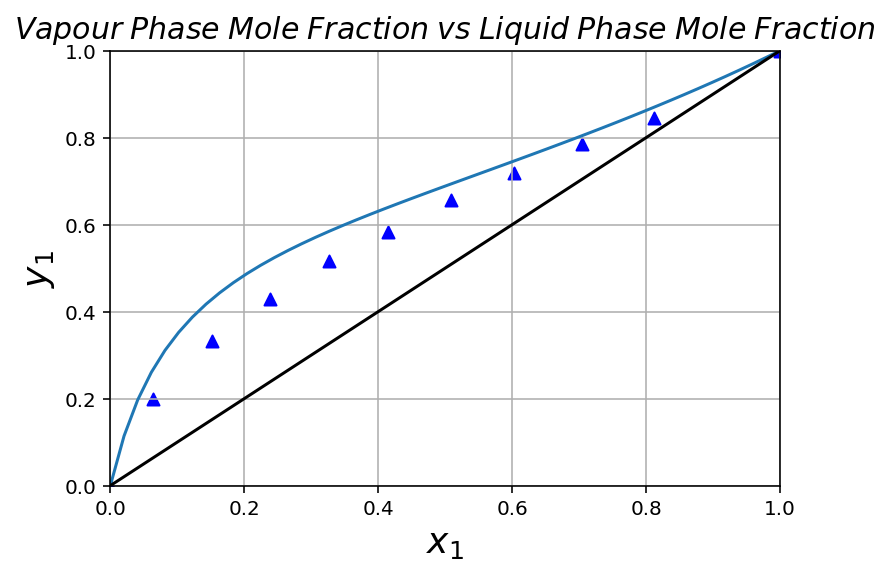

In [43]:
# Lets take an Isothermal System for convinience
T_sample = 300 #K
VP = VapourPressure()
PS1 = VP.VapAcet(T_sample)
PS2 = VP.VapBenz(T_sample)
x_sample = np.linspace(0,1,50)
wilson_sample = Wilson()
gamma1_sample = np.zeros(x_sample[1:-1].size)
gamma2_sample = np.zeros(x_sample[1:-1].size)
for i in range(1,len(x_sample)-1):
        wilson_sample.getParam(T_sample, A1, A2)
        gamma1_sample[i-1],gamma2_sample[i-1] = wilson.getGamma(T_sample,x_sample[i], A1, A2)
Ptot = np.zeros(x_sample.size) ; Ptot[0] = PS2 ; Ptot[-1] = PS1 
Ptot[1:-1] = x_sample[1:-1]*gamma1_sample*PS1+(1-x_sample[1:-1])*gamma2_sample*PS2 
y1_sample = np.zeros(x_sample.size) ; y1_sample[0] = 0 ; y1_sample[-1] = 1
y1_sample[1:-1] = x_sample[1:-1]*gamma1_sample*PS1/Ptot[1:-1]
plt.plot(x_sample,y1_sample)
plt.plot([0,1],[0,1],'k')
plt.scatter(x1,y1,c = 'b', marker = '^')
plt.xlabel('$x_{1}$',fontsize = 18)
plt.ylabel('$y_{1}$',fontsize = 18)
plt.xlim([0,1])
plt.ylim([0,1])  
plt.title('$Vapour\; Phase \;Mole\; Fraction\; vs\; Liquid\; Phase\; Mole\; Fraction$',fontsize = 15)
plt.grid(True)

## Renon and Prausnitz NRTL Model : <br> The equations are  : <br> $ \frac{G^{E}}{RT} = x_{1}x_{2}( \frac{G_{21}\tau_{21}}{x_{1}+x_{2}G_{21}} + \frac{G_{12}\tau_{12}}{x_{2}+x_{1}G_{12}} ) $ <br> $ ln(\gamma_{1}) = x^{2}_{2}[\tau_{21}(\frac{G_{21}}{x_{1}+x_{2}G_{21}})^{2} +  \frac{G_{12}\tau_{12}}{(x_{2}+x_{1}G_{12})^{2}} ] $ <br>  $ ln(\gamma_{2}) = x^{2}_{1}[\tau_{12}(\frac{G_{12}}{x_{2}+x_{1}G_{12}})^{2} +  \frac{G_{21}\tau_{21}}{(x_{1}+x_{2}G_{21})^{2}} ] $ <br> $ G_{12}=exp(-\alpha\tau_{12}) \; \; \; G_{21}=exp(-\alpha\tau_{21}) $ <br> $ \tau_{12}=\frac{b_{12}}{RT} \; \; \; \tau_{21}=\frac{b_{21}}{RT} $ <br>So essentially the parameters are : $ b_{12} \; and \; b_{21} $ <br> $ \alpha \; is \; a \; fixed \; parameter \; and \; is \; not \; a \; parameter \; to \; be \; estimated $ 

### I will define a Class that will Handle all the Operations related to this Model 

In [20]:
class NRTL : 
    R = 8.314462
    alpha = 0.4307
    def getParam(self,T, b12, b21) : 
        self.tau12 = b12/R/T 
        self.tau21 = b21/R/T
        self.G12 = np.exp(-self.alpha*self.tau12)
        self.G21 = np.exp(-self.alpha*self.tau21)
        return (self.tau12, self.tau21, self.G12, self.G21)
    
    def getGamma(self,T,x_1, b12, b21) :
        (tau12, tau21, G12, G21 ) = self.getParam(T, b12, b21)
        x_2 = 1-x_1
        ln_gamma1 = (x_2**2)*( tau21*(G21/(x_1 + x_2*G21))**2 + G12*tau12/((x_2 + x_1*G12)**2)) 
        ln_gamma2 = (x_1**2)*( tau12*(G12/(x_2 + x_1*G12))**2 + G21*tau21/((x_1 + x_2*G21)**2)) 
        self.gama1 = np.exp(ln_gamma1)
        self.gama2 = np.exp(ln_gamma2)
        return (self.gama1,self.gama2)
    
    def getGe(self,T, x_1) :
        x_2 = 1-x_1
        self.geRT = x_1*np.log(self.gama1) + x_2*np.log(self.gama2)
        return self.geRT*R*T 
    
    def ObjectiveFunc(self,A) :
        
        G_12 = np.zeros(len(x1)) ; G_21 = np.zeros(len(x1))
        gam1 = np.zeros(len(x1)) ; gam2 = np.zeros(len(x1))
        Ge = np.zeros(len(x1))
        for i in range(1,len(x1)-1):
            (tau12, tau21, g12, g21) = self.getParam(T_K[i], A[0], A[1])
            G_12[i],G_21[i] = g12,g21
            (g1,g2) = self.getGamma(T_K[i],x1[i], A[0], A[1])
            gam1[i],gam2[i] = g1,g2
            Ge[i] = self.getGe(T_K[i],x1[i])
        
    
        error = np.sum((ge - Ge)**2)   
   
        return error

## Minimizing the Objective function to find the parameters : 

In [21]:
x0 = np.zeros(2)
x0[0] = 0.1 ; x0[1] = 0.1
model = NRTL()
sol = minimize(model.ObjectiveFunc , x0 )
(b12,b21) = sol.x[0],sol.x[1]

## We will now Check if the model works or not : 

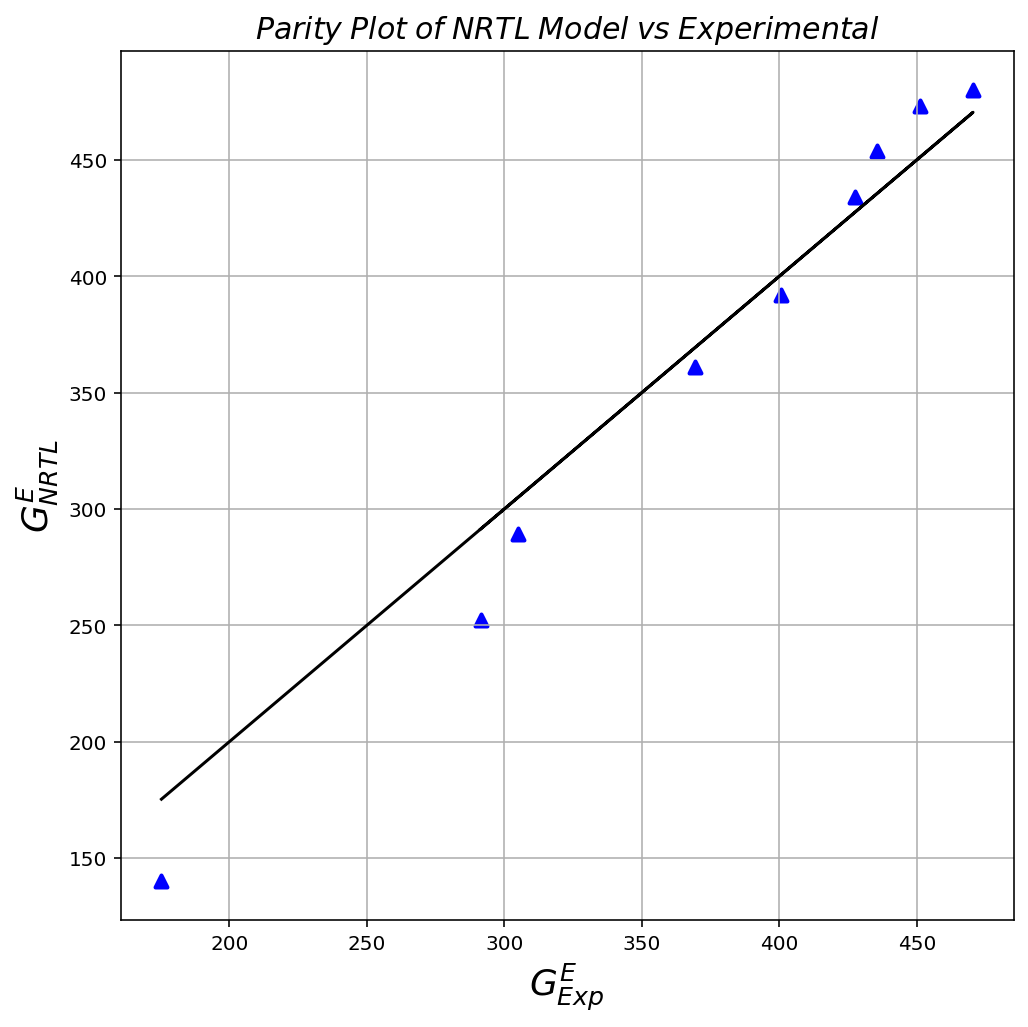

In [22]:
nrtl = NRTL()
Ge_nrtl = np.zeros(len(x1))
for i in range(1,len(x1)-1):
        nrtl.getParam(T_K[i], b12, b21)
        nrtl.getGamma(T_K[i],x1[i], b12, b21)
        Ge_nrtl[i] = nrtl.getGe(T_K[i],x1[i])
plt.figure(figsize = (8,8))
plt.scatter(ge[1:-1],Ge_nrtl[1:-1], c = 'b', marker = '^',linewidths = 2, label = True)
plt.plot(ge[1:-1],ge[1:-1], 'k')
plt.xlabel('$G^{E}_{Exp}$',fontsize = 18)
plt.ylabel("$G^{E}_{NRTL}$",fontsize = 18) 
plt.title('$Parity \; Plot \; of \; NRTL \; Model \; vs\; Experimental $',fontsize = 15) 
plt.grid(True)

## Comparison of Models : 

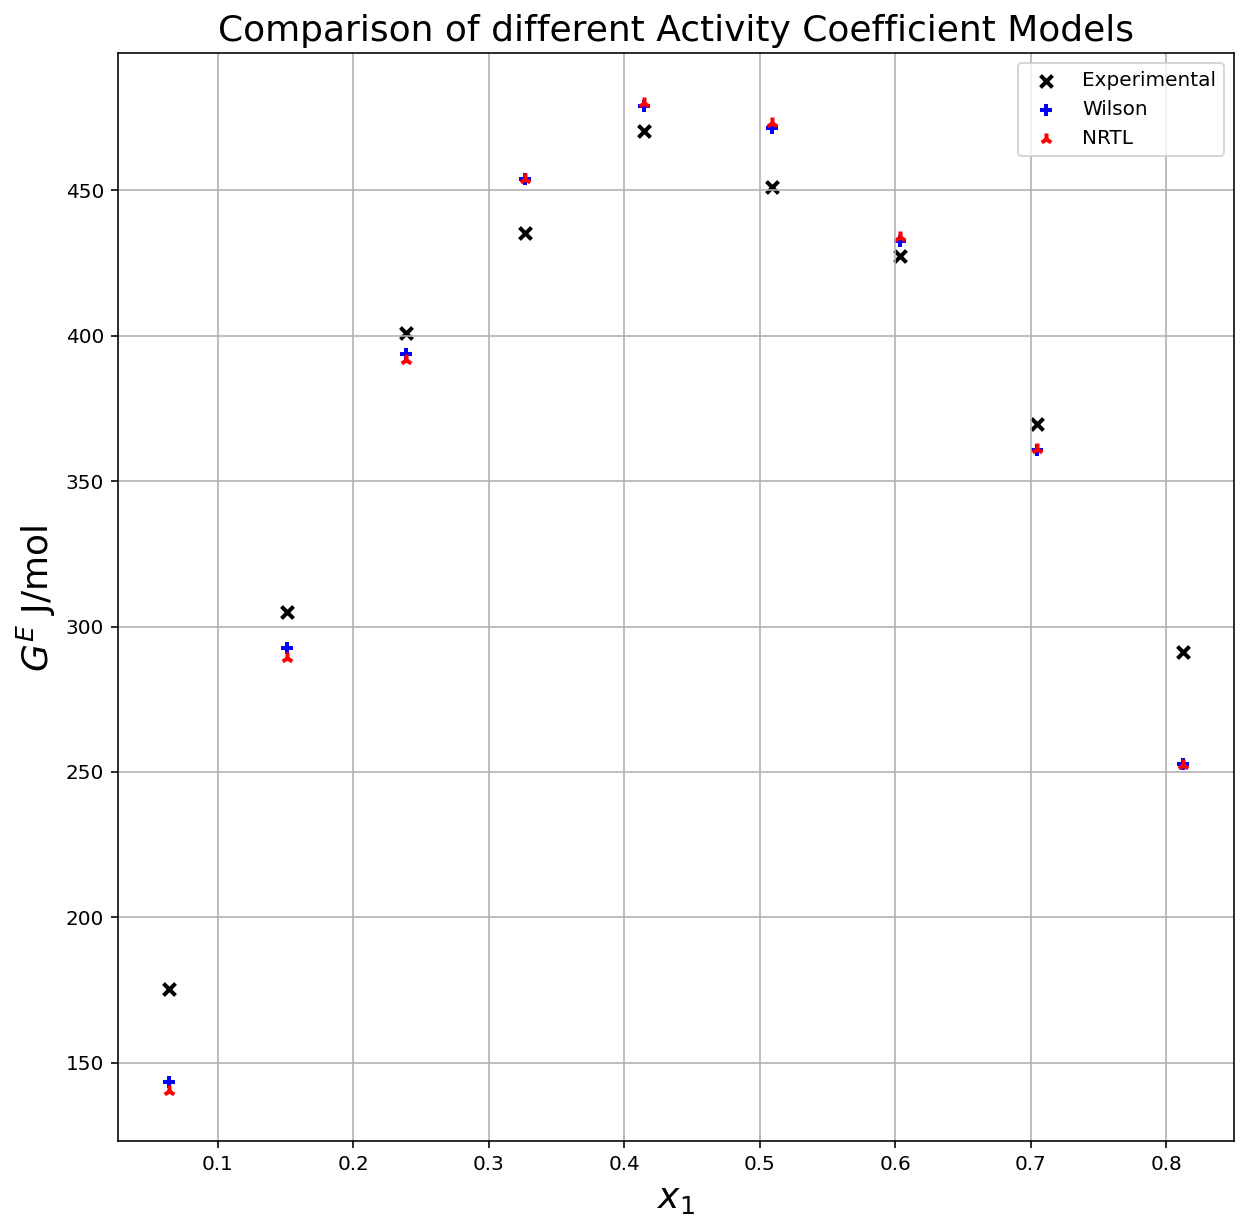

In [23]:
plt.figure(figsize = (10,10))
plt.scatter(x1[1:-1], ge[1:-1], c = 'k', marker = 'x', linewidths = 2, label = 'Experimental' )
plt.scatter(x1[1:-1], Ge[1:-1], c = 'b', marker = '+',linewidths = 2, label = 'Wilson' )
plt.scatter(x1[1:-1], Ge_nrtl[1:-1], c = 'r', marker = '2', linewidths = 2, label = 'NRTL')
plt.legend(loc = 'best')
plt.xlabel('$x_{1}$', fontsize = 18)
plt.ylabel('$G^{E} $ J/mol ', fontsize = 18)
plt.title('Comparison of different Activity Coefficient Models', fontsize = 18)
plt.grid(True)

## Validating our Model with Data from Literature : 

### The following data has been taken from the paper *Vapour-Liquid Equilibria of the Systems Acetone-Benzene, Benzene-Cyclohexane and Acetone-Cyclohexane at 25 °C  ; Aleksandar et.al (1978)* 

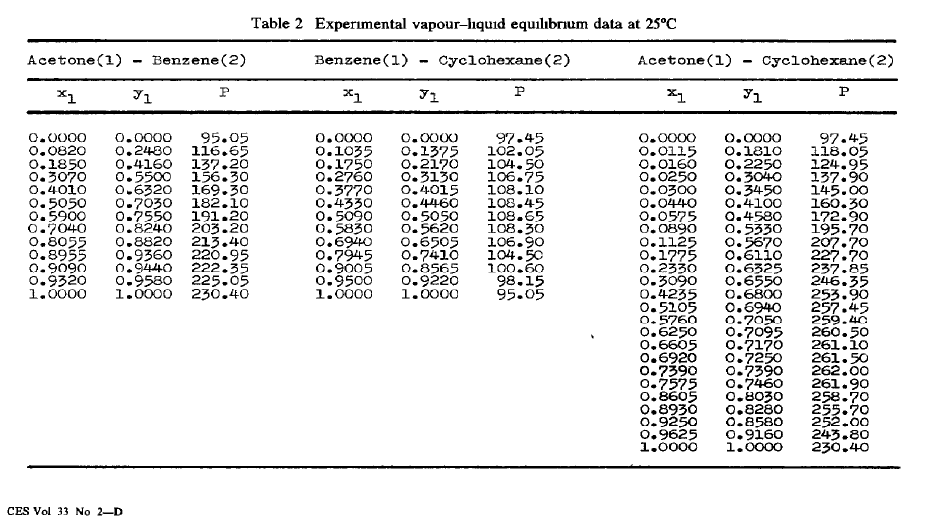

In [24]:
image = Image.open('vle_data_benzene_acetone.PNG')
image

Text(0, 0.5, '$y_{1}$')

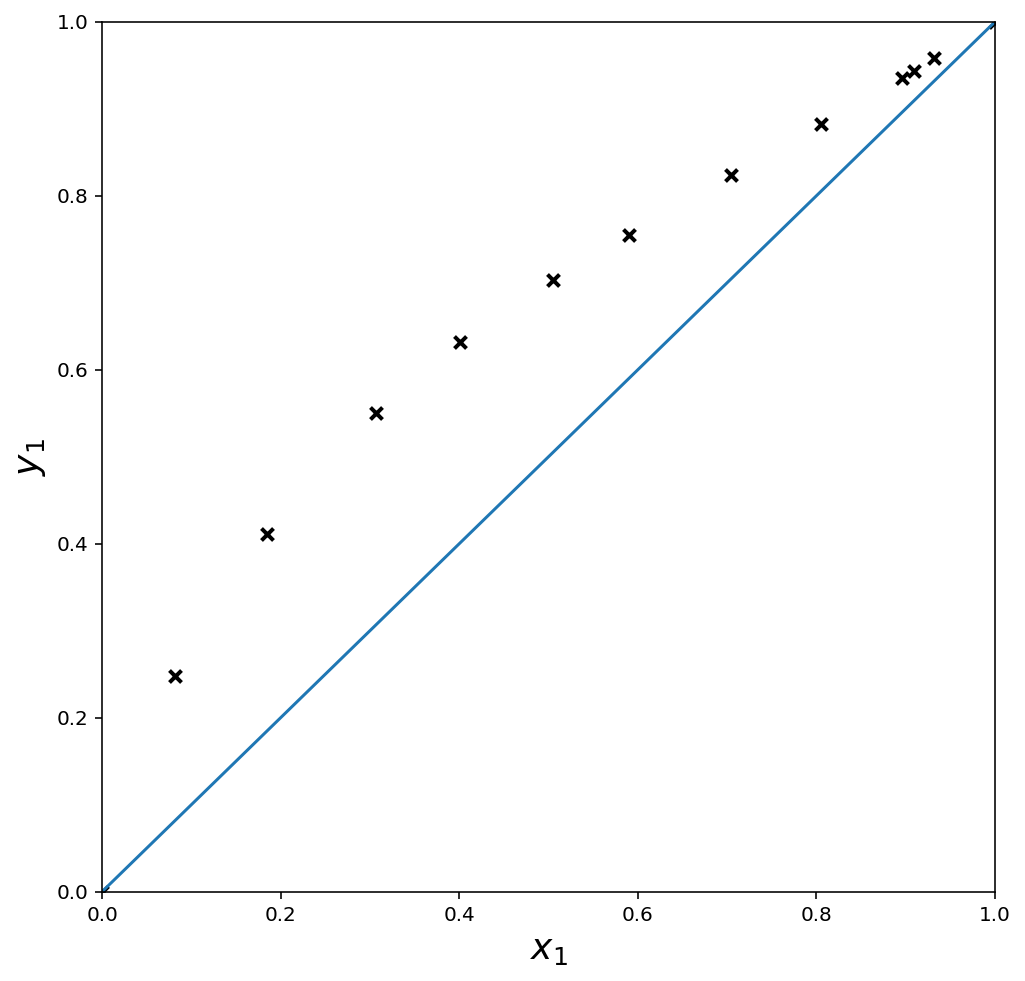

In [25]:
T = 25 + 273.16 
x1_lit = np.array([0,0.0820,0.1850,0.3070,0.4010,0.5050,0.5900,0.7040,0.8055,0.8955,0.9090,0.9320,1])
y1_lit = np.array([0,0.2480,0.4106,0.5500,0.6320,0.7030,0.7550,0.8240,0.8820,0.9360,0.9440,0.9580,1])
x2_lit = 1 - x1_lit ;  y2_lit = 1- y1_lit
P = np.array([95.05,116.65,137.20,156.30,169.30,182.10,191.20,203.20,213.40,220.95,222.35,225.05,230.40])
plt.figure(figsize = (8,8))
plt.scatter(x1_lit,y1_lit, c = 'k', marker = 'x', linewidths = 2)
plt.plot([0,1],[0,1])
plt.xlim([0,1]); plt.ylim([0,1])
plt.xlabel('$x_{1}$', fontsize = 18)
plt.ylabel('$y_{1}$',  fontsize = 18)

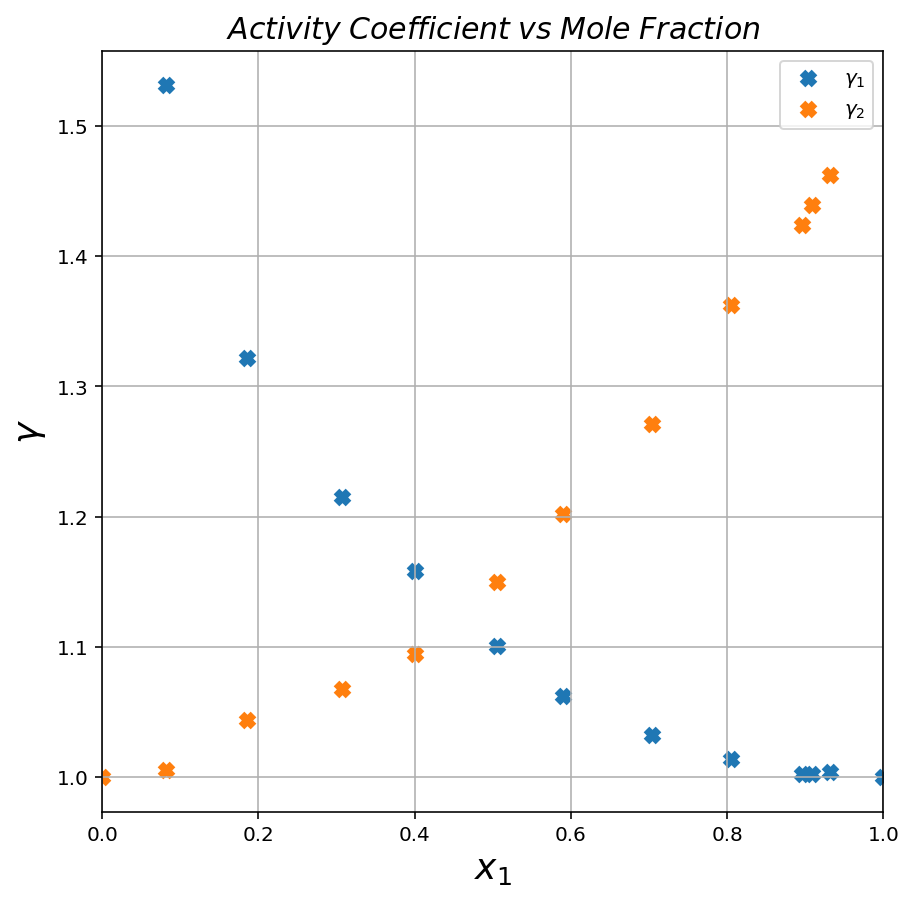

In [26]:
VP = VapourPressure()
VP_1_lit = P[-1]
VP_2_lit = P[0]
gamma_1_lit = np.divide(np.multiply(P[1:],y1_lit[1:]),x1_lit[1:])/VP_1_lit 
gamma_2_lit = np.divide(np.multiply(P[:-1],y2_lit[:-1]),x2_lit[:-1])/VP_2_lit
plt.figure(figsize = (7,7))
plt.scatter(x1_lit[1:],gamma_1_lit, marker = 'x' ,linewidths = 4 , label = '$\gamma_{1}$')
plt.scatter(x1_lit[:-1],gamma_2_lit,marker = 'x', linewidths = 4 , label = '$\gamma_{2}$')
plt.xlabel('$x_{1}$',fontsize = 18 )
plt.ylabel('$\gamma$',fontsize = 18 ) 
plt.xlim([0,1])
plt.title('$Activity \; Coefficient \; vs \; Mole \; Fraction $',fontsize = 15)
plt.grid(True)
plt.legend(loc = 'best')


## Adding all the necessary Columns : 

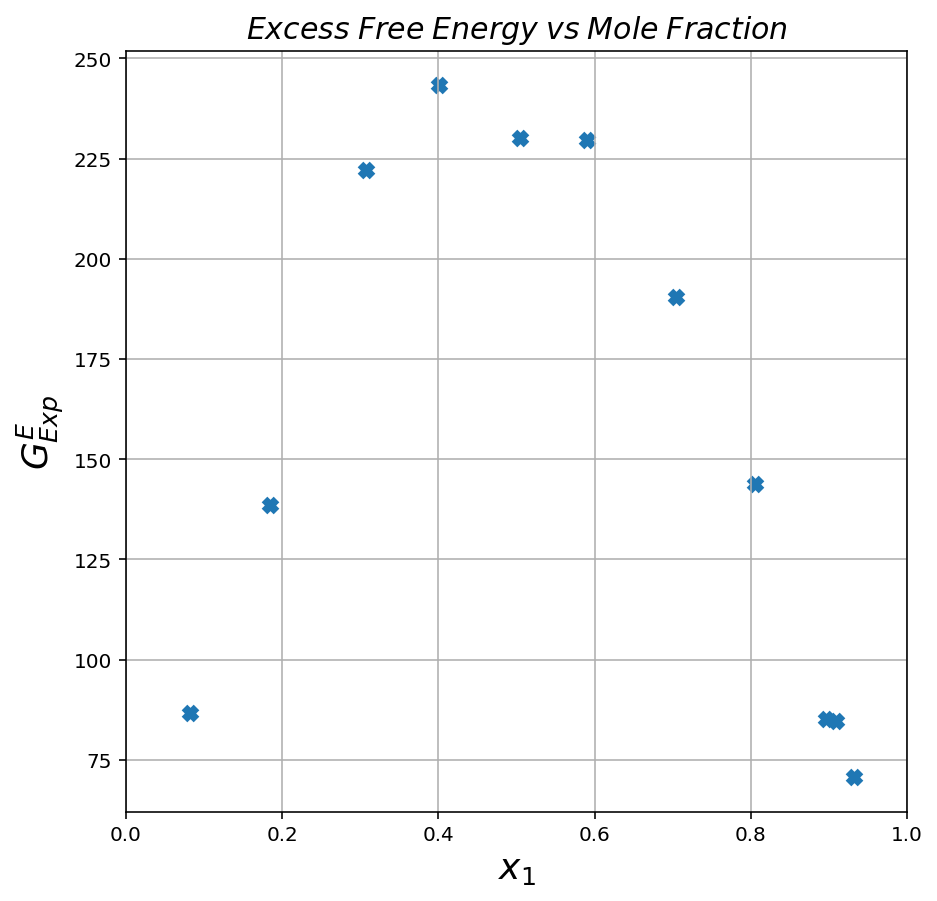

In [27]:
data_lit = pd.DataFrame()
data_lit['$x_{1}$'] = x1_lit
data_lit['$y_{1}$'] = y1_lit
data_lit['P, mmHg'] = P
gamma_1_dat = np.concatenate((['-'],gamma_1_lit), axis=0)
gamma_2_dat = np.concatenate((gamma_2_lit,['-']), axis=0)
data_lit['$\gamma_{1}$'] = gamma_1_dat
data_lit['$\gamma_{2}$'] = gamma_2_dat
Ge_lit = R*T*np.array([x1_lit[i]*np.log(gamma_1_lit[i-1])+x2_lit[i]*np.log(gamma_2_lit[i-1]) for i in range(1,len(x1_lit)-1)])
Ge_dat = np.concatenate(([0],Ge_lit,[0]), axis=0)
plt.figure(figsize = (7,7))
plt.scatter(x1_lit[1:-1],Ge_lit,marker = 'x' ,linewidths = 4)
plt.xlabel('$x_{1}$',fontsize = 18 )
plt.ylabel('$G^{E}_{Exp}$',fontsize = 18 ) 
plt.xlim([0,1])
plt.title('$Excess \; Free \; Energy \; vs \; Mole \; Fraction $',fontsize = 15)
plt.grid(True)
data_lit['$G^{E}_{Exp}$ J/mol'] = Ge_dat

### Here is how our data looks like : 

In [28]:
data_lit

,$x_{1}$,$y_{1}$,"P, mmHg",$\gamma_{1}$,$\gamma_{2}$,$G^{E}_{Exp}$ J/mol
0,0.0000,0.0000,95.05,-,1.0,0.000000
1,0.0820,0.2480,116.65,1.531228827913279,1.0053280064729149,86.612170
2,0.1850,0.4106,137.20,1.3216572822822823,1.043889460826236,138.639802
3,0.3070,0.5500,156.30,1.215348466340934,1.067790704823845,222.224404
4,0.4010,0.6320,169.30,1.1581030063729565,1.0942733768976702,243.316718
5,0.5050,0.7030,182.10,1.1002501031353136,1.1495002630194637,230.157234
6,0.5900,0.7550,191.20,1.061940913370998,1.2020374385753325,229.514922
7,0.7040,0.8240,203.20,1.0322758838383836,1.2711375236362086,190.470987
8,0.8055,0.8820,213.40,1.0141798572315333,1.3620865219090479,143.795655
9,0.8955,0.9360,220.95,1.002355527638191,1.4236576568867036,85.277110


# Predicting the Excess Free Energy using our Models : 

In [29]:
T_lit = T*np.ones(len(x1_lit))

## Wilsons Model :

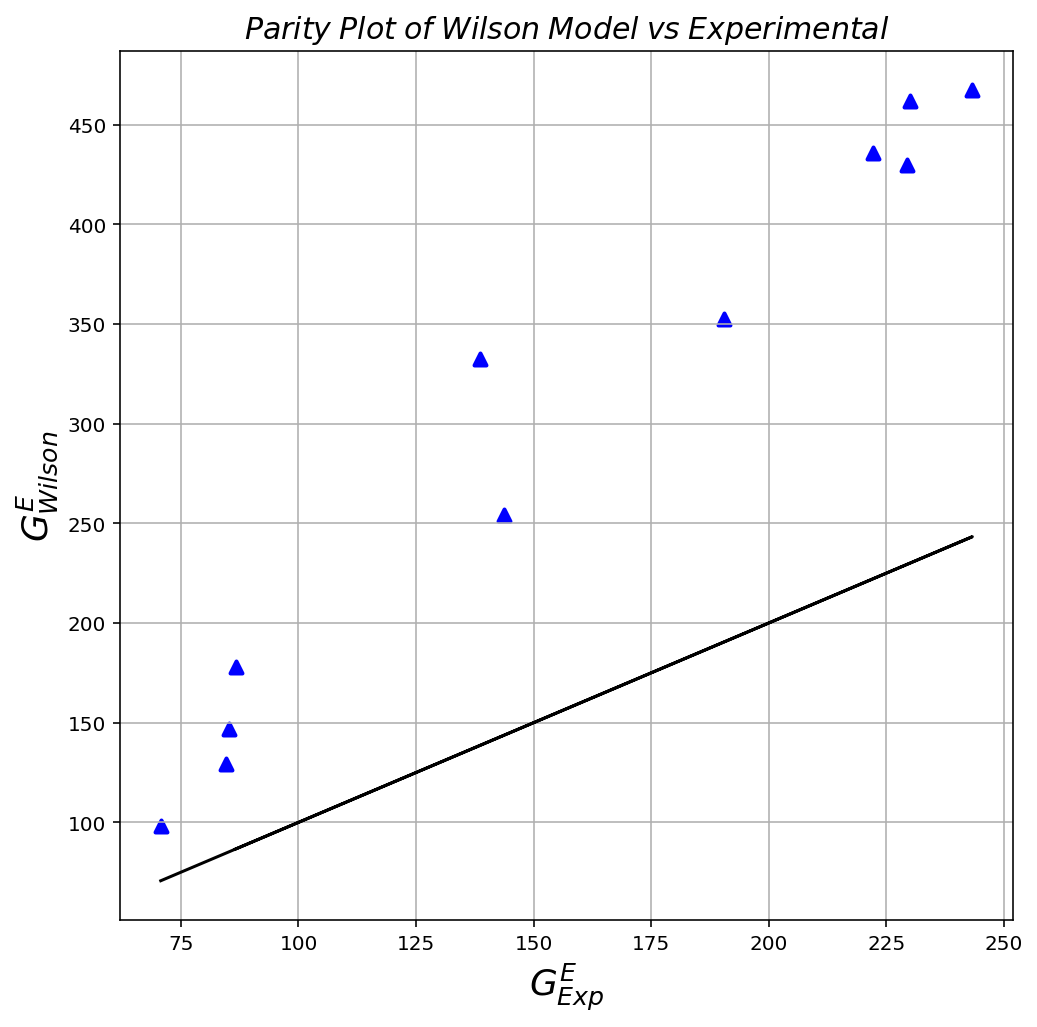

In [30]:
wilson2 = Wilson()
Ge_wil_1 = np.zeros(len(x1_lit))
for i in range(1,len(x1_lit)-1):
        wilson2.getParam(T, A1, A2)
        wilson2.getGamma(T,x1_lit[i], A1, A2)
        Ge_wil_1[i] = wilson2.getGe(T,x1_lit[i])
plt.figure(figsize = (8,8))
plt.scatter(Ge_lit,Ge_wil_1[1:-1] ,c = 'b', marker = '^',linewidths = 2, label = True) 
plt.plot(Ge_lit,Ge_lit, 'k')
plt.xlabel('$G^{E}_{Exp}$',fontsize = 18)
plt.ylabel("$G^{E}_{Wilson}$",fontsize = 18) 
plt.title('$Parity \; Plot \; of \; Wilson \; Model \; vs\; Experimental $',fontsize = 15)        
plt.grid(True)

## NRTL Model :

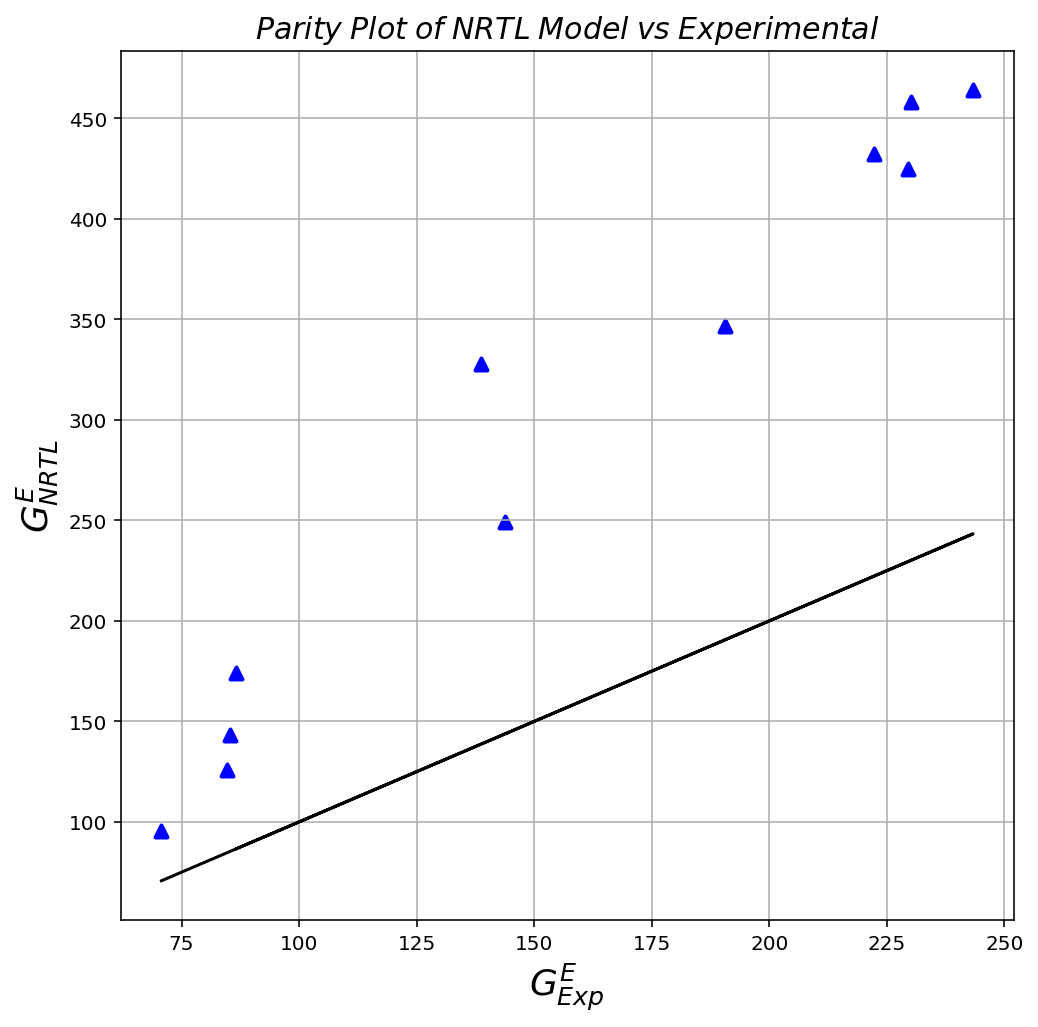

In [31]:
nrtl2 = NRTL()
Ge_nrtl_1 = np.zeros(len(x1_lit))
for i in range(1,len(x1_lit)-1):
        nrtl2.getParam(T, b12, b21)
        nrtl2.getGamma(T,x1_lit[i], b12, b21)
        Ge_nrtl_1[i] = nrtl2.getGe(T,x1_lit[i])
plt.figure(figsize = (8,8))
plt.scatter(Ge_lit,Ge_nrtl_1[1:-1], c = 'b', marker = '^',linewidths = 2, label = True)
plt.plot(Ge_lit,Ge_lit, 'k')
plt.xlabel('$G^{E}_{Exp}$',fontsize = 18)
plt.ylabel("$G^{E}_{NRTL}$",fontsize = 18) 
plt.title('$Parity \; Plot \; of \; NRTL \; Model \; vs\; Experimental $',fontsize = 15) 
plt.grid(True)

## Comparison of Models : 

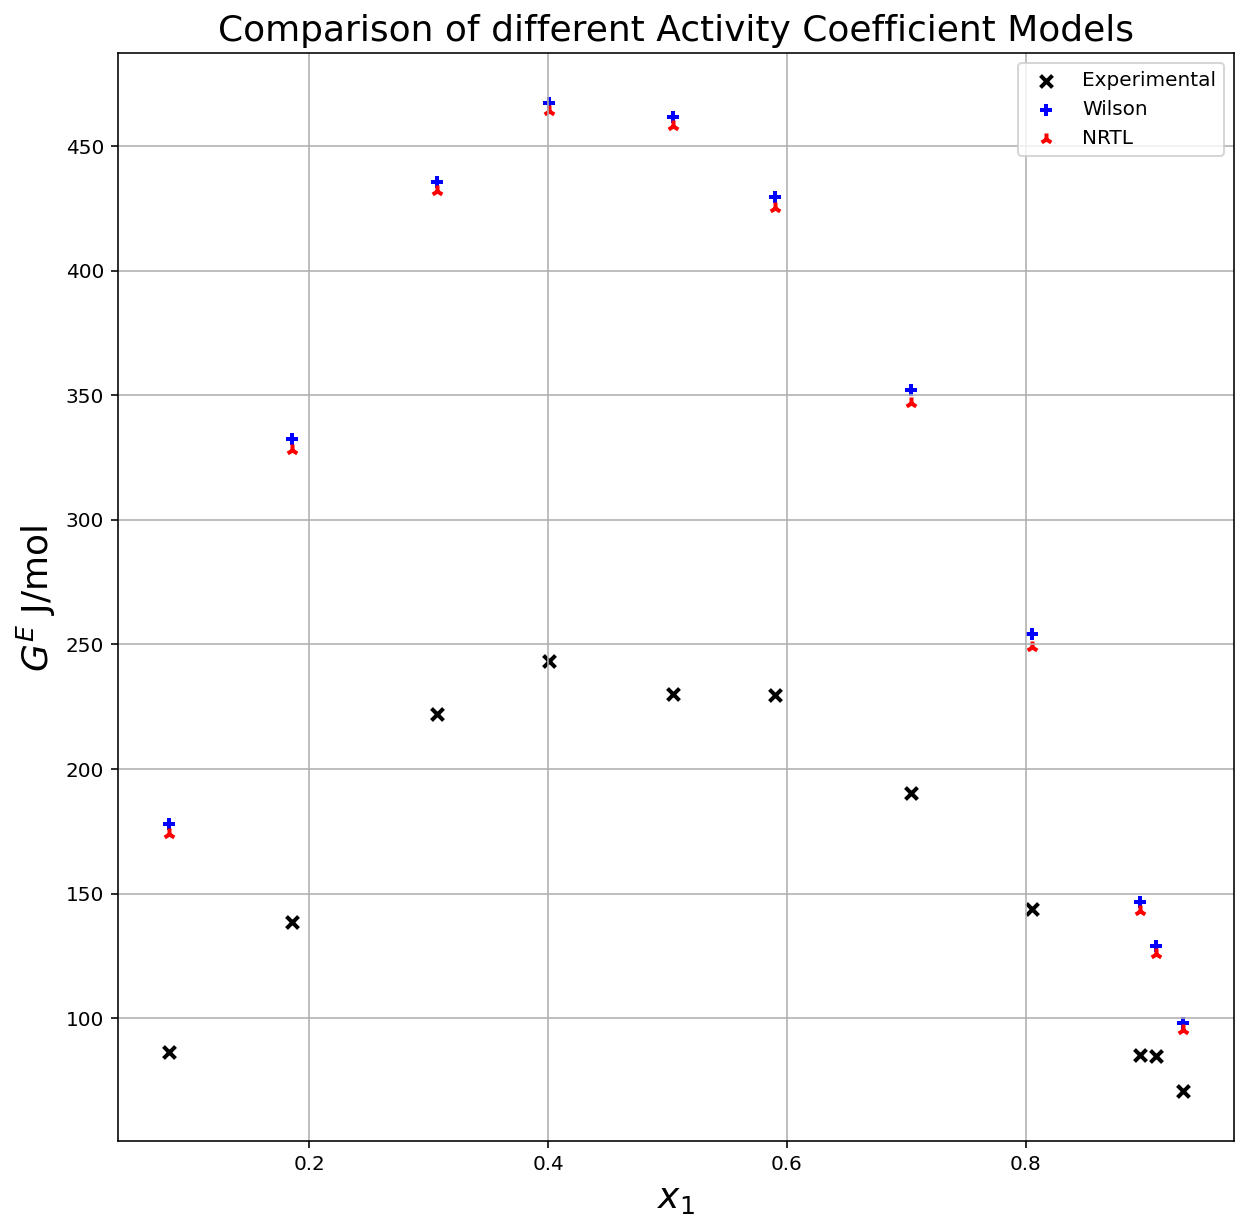

In [32]:
plt.figure(figsize = (10,10))
plt.scatter(x1_lit[1:-1], Ge_lit, c = 'k', marker = 'x', linewidths = 2, label = 'Experimental' )
plt.scatter(x1_lit[1:-1], Ge_wil_1[1:-1], c = 'b', marker = '+', linewidths = 2, label = 'Wilson' )
plt.scatter(x1_lit[1:-1], Ge_nrtl_1[1:-1], c = 'r', marker = '2', linewidths = 2, label = 'NRTL')
plt.legend(loc = 'best')
plt.xlabel('$x_{1}$', fontsize = 18)
plt.ylabel('$G^{E} $ J/mol ', fontsize = 18)
plt.title('Comparison of different Activity Coefficient Models', fontsize = 18)
plt.grid(True)